
<a href="https://githubtocolab.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_R2.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


# Algoritmos de optimización - Reto 2

Nombre: <br> Miguel López Vélez <br>
Github: <br> [Astolfo2332](https://github.com/Astolfo2332/VIU_act) <br>


## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

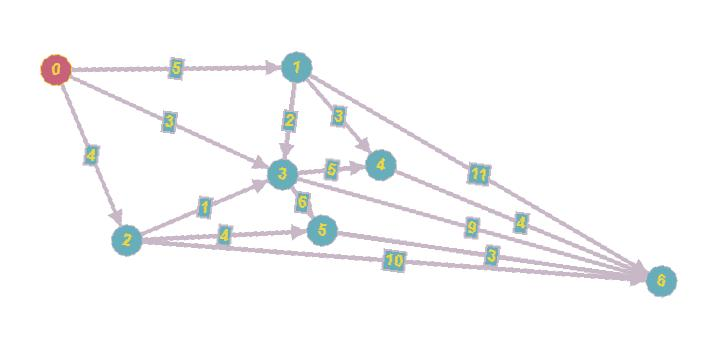

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [14]:

#Viaje por el rio - Programación dinámica
################################################################################

#Definimos el grafo inicial

#Nodos
class Embarcadero:
    def __init__(self):
        #Iniciamos los nodos
        self.nodos ={0: [1, 2, 3],
                     1: [3, 4, 6],
                     3: [4, 5, 6],
                     2: [3, 5, 6],
                     4: [6],
                     5: [6]}
        #Iniciamos los costos de ir de un nodo a otro
        self.costos = {(0,1): 5, (0,2): 4,
                       (0,3): 3, (1,3): 2,
                       (1,4): 3, (1,6): 11,
                       (3,4): 5, (3,5): 6,
                       (3,6): 9, (2,3): 1,
                       (2,5): 4, (2,6): 10,
                       (4,6): 4, (5,6): 3}
        self.viaje = []
        self.memo = {}

    def T_costos(self, i, j):
        if (i, j) in self.costos:
            return self.costos[(i, j)]
        #Definimos un valor muy grande si no existe la conexión
        else:
            return float('inf')

    def resolver(self):
        #Vamos a explorar todas las posibilidades
        #Vamos a hacerlo por recursividad
        # Si llegamos al destino
        def dinamic(i, camino_actual):
            if i == 6:
                return 0, camino_actual
            # Calculamos el mínimo costo para los nodos conectados
            min_costo = float('inf')
            mejor_camino = []
            for j in self.nodos[i]:
                #La función a minimizar similar a lo estudiado
                costo_actual, camino = dinamic(j, camino_actual + [j])
                costo_actual += self.T_costos(i, j)
                if costo_actual < min_costo:
                    min_costo = costo_actual
                    mejor_camino = camino
            return min_costo, mejor_camino

        # Iniciamos la recursión con el nodo 0
        costo_total, mejor_camino = dinamic(0, [0])
        return costo_total, mejor_camino

    def __str__(self):
        costo_total, mejor_camino = self.resolver()
        return f"El costo camino más corto es {costo_total} y el camino es {mejor_camino}"


emb = Embarcadero()

print(emb)

El costo camino más corto es 11 y el camino es [0, 2, 5, 6]


## Descenso del gradiente

In [10]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [38]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

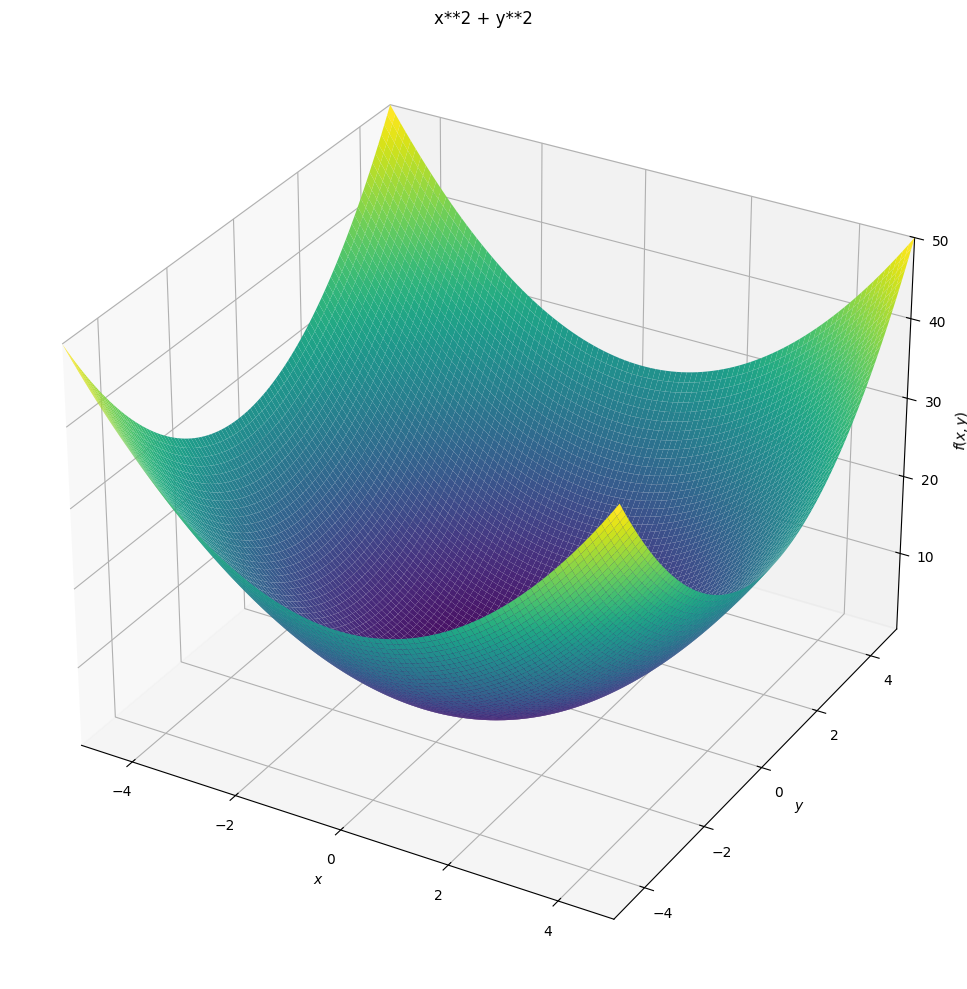

In [3]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

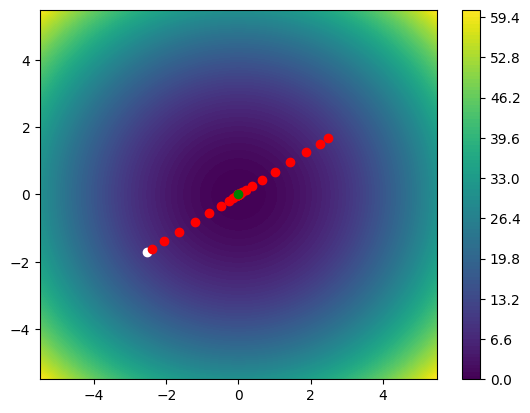

Solucion: [-1.3189437947014406e-05, -8.883884710024268e-06] 2.528846808991466e-10


In [39]:
#Prepara los datos para dibujar mapa de niveles de Z
import numpy as np

resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1
tol = 0.0001

#Iteraciones:50
for _ in range(1000):

  grad = df(P)
  #Reducción de la tasa de aprendizaje
  TA *= 0.99
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  #Adición de una tolerancia para no iterar sin necesidad
  if np.linalg.norm(grad)<tol:
    break

  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


Algo bastante cercano a (0,0) que es el mínimo global.

## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
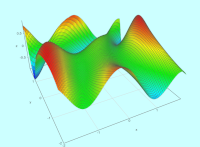


Primero que todo ¿es necesario hacer 1000 iteraciones para encontrar el minimo? Podemos optimizar esto agregando una tolerancia que si es el caso que no avanza más el proceso se detenga

In [1]:
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')

f = sp.sin(1/2 * x**2 - 1/4 * y**2 + 3) * sp.cos(2*x + 1 - sp.exp(y))
f_x = sp.diff(f, x)
f_y = sp.diff(f, y)

print(f_x)
print(f_y)

1.0*x*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) - 2*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)
-0.5*y*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) + exp(y)*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)


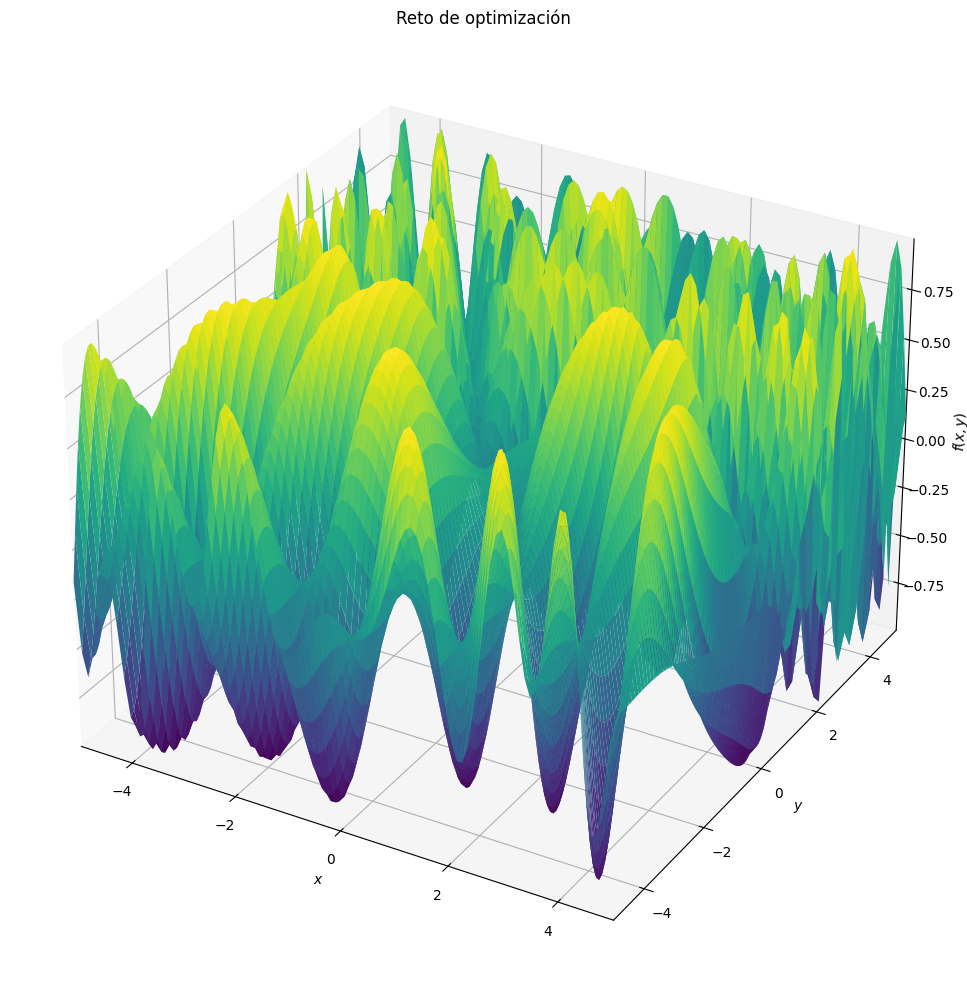

In [4]:
plot3d(f,
       (x,-5,5),(y,-5,5),
       title='Reto de optimización',
       size=(10,10))

In [5]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

#Definimos la funcion gradiente
df = lambda X: [(math.cos(2 * X[0] - math.exp(X[1]) + 1)

                * math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) - 2
                * math.sin(2 * X[0] - math.exp(X[1]) + 1)
                * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3)
                * X[0]),
                -0.5 * X[1] * math.cos(2 * X[0] - math.exp(X[1]) + 1)
                * math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3)
                * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3)]

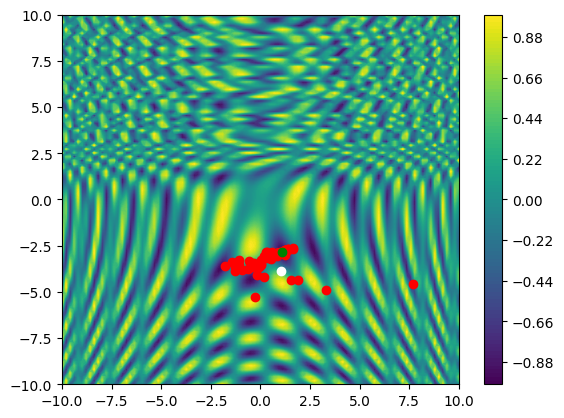

Solucion: [1.0996584562749847, -2.852241079333058] -0.9999999999216223


In [73]:

resolucion = 100
rango=10

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
        Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1
tol = 0.0001

#Iteraciones:50
for _ in range(1000):

    grad = df(P)
    #Reducción de la tasa de aprendizaje
    TA *= 0.99
    P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
    #Adición de una tolerancia para no iterar sin necesidad
    if np.linalg.norm(grad)<tol:
        break

    plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


Cabe resaltar que el proceso de optimización en este tipo de ecuaciones puede tener varias soluciones o rutas a tomar, debido a la cantidad de mínimos locales como se puede observar en la imagen y dicho valor de minimo local dependerá en gran parte del valor semilla seleccionado.

Para ello vamos a colorear diferentes caminos que llevan a mínimos locales dependiendo de la selección de su valor semilla

Solucion: [-1.266634574108858, -3.8963940531146726] 0.00011548550441823033
Solucion: [-1.2666345971011548, -3.896394077116083] 0.00011548489564284329
Solucion: [2.201791366735785, 1.6870634370694928] -0.9999999999467821
Solucion: [-1.0471585390825822, 1.2920891889119197] 0.00023862139867457627


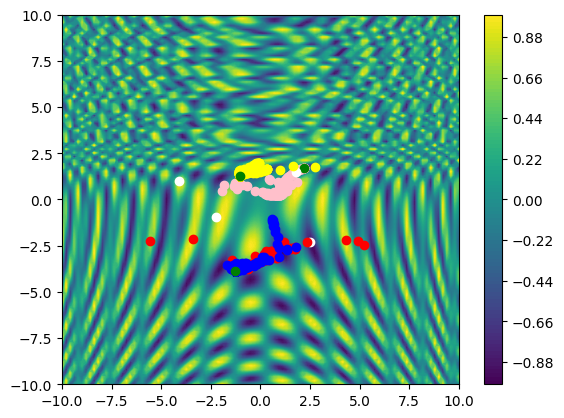

In [12]:

resolucion = 100
rango=10

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
        Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

colors = ["red", "blue", "pink", "yellow"]

for color in colors:
    #Generamos un punto aleatorio inicial y pintamos de blanco
    P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
    plt.plot(P[0],P[1],"o",c="white")

    #Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
    TA=1
    tol = 0.0001

    #Iteraciones:50
    for _ in range(1000):

        grad = df(P)
        #Reducción de la tasa de aprendizaje
        TA *= 0.99
        P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
        #Adición de una tolerancia para no iterar sin necesidad
        plt.plot(P[0],P[1],"o",c=color)

        if np.linalg.norm(grad)<tol:
            break


    #Dibujamos el punto final y pintamos de verde
    plt.plot(P[0],P[1],"o",c="green")
    print("Solucion:" , P , f(P))

plt.show()
